In [2]:
import sys
import matplotlib
import numpy as np
import scipy as sp
import sklearn 
import pandas as pd

【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [3]:
#data_set put in df
df = pd.read_csv('/Users/user/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.shape

(1460, 81)

【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

各特徴量がどういったものかを見る。（数値データか文字データなど
今回の目的変数はどの列か確認する。

予測対象は売値。
家の備品有無など細かいデータがある

これは、データ記述ファイルにあるものの簡単なバージョンです。

SalePrice-プロパティの売却価格（ドル）。これは、予測しようとしているターゲット変数です。
MSSubClass：構築クラス
MSZoning：一般的なゾーニング分類
LotFrontage：プロパティに接続されている通りの直線フィート
LotArea：平方フィート単位のロットサイズ
通り：道路アクセスの種類
路地：路地へのアクセスの種類
LotShape：プロパティの一般的な形状
LandContour：プロパティの平坦度
ユーティリティ：利用可能なユーティリティの種類
LotConfig：ロット構成
LandSlope：プロパティの勾配
近所：エイムス市域内の物理的な場所
条件1：主要道路または鉄道の近く
条件2：主要道路または鉄道への近接性（1秒が存在する場合）
BldgType：住居のタイプ
HouseStyle：住まいのスタイル
OverallQual：全体的な素材と仕上げの品質
OverallCond：全体的な状態の評価
YearBuilt：元の建設日
YearRemodAdd：改造日
RoofStyle：屋根のタイプ
RoofMatl：屋根材
Exterior1st：家の外装
Exterior2nd：家の外装カバー（複数の材料の場合）
MasVnrType：石材突き板タイプ
MasVnrArea：平方フィートの石材突き板面積
ExterQual：外装材の品質
ExterCond：外装の素材の現状
基礎：基礎の種類
BsmtQual：地下室の高さ
BsmtCond：地下室の一般的な状態
BsmtExposure：ウォークアウトまたは庭レベルの地下壁
BsmtFinType1：地下室完成エリアの品質
BsmtFinSF1：タイプ1完成した平方フィート
BsmtFinType2：2番目の終了エリアの品質（存在する場合）
BsmtFinSF2：タイプ2完成した平方フィート
BsmtUnfSF：地下室の未完成の平方フィート
TotalBsmtSF：地下室の総平方フィート
加熱：加熱のタイプ
HeatingQC：加熱品質と状態
CentralAir：セントラルエアコン
電気：電気システム
1stFlrSF：1階平方フィート
2ndFlrSF：2階平方フィート
LowQualFinSF：低品質の完成した平方フィート（すべてのフロア）
GrLivArea：地上（地上）のリビングエリアの平方フィート
BsmtFullBath：地下室のフルバスルーム
BsmtHalfBath：地下半分のバスルーム
FullBath：グレード以上のフルバスルーム
ハーフバス：グレード以上のハーフバス
ベッドルーム：地下階以上のベッドルームの数
キッチン：キッチンの数
KitchenQual：キッチンの品質
TotRmsAbvGrd：グレードを超える客室の合計（バスルームは含まれません）
機能：ホーム機能の評価
暖炉：暖炉の数
FireplaceQu：暖炉の品質
GarageType：ガレージの場所
GarageYrBlt：ガレージが建設された年
GarageFinish：ガレージの内部仕上げ
GarageCars：車の容量におけるガレージのサイズ
GarageArea：平方フィート単位のガレージのサイズ
GarageQual：ガレージの品質
GarageCond：ガレージの状態
PavedDrive：舗装された私道
WoodDeckSF：平方フィートのウッドデッキエリア
OpenPorchSF：平方フィートのオープンポーチエリア
囲まれたポーチ：平方フィートの囲まれたポーチエリア
3SsnPorch：平方フィートの3シーズンポーチエリア
ScreenPorch：平方フィートのスクリーンポーチエリア
PoolArea：平方フィートのプールエリア
PoolQC：プールの品質
フェンス：フェンスの品質
MiscFeature：その他の機能は他のカテゴリには含まれていません
MiscVal：その他の機能の$ Value
MoSold：販売月
YrSold：販売年
SaleType：販売のタイプ
SaleCondition：販売条件

目的変数は　販売価格


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

特徴量の平均値と標準偏差、四分位数を一度に表示させる

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

各特徴量の欠損値の有無を確認する。
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

ResidentMario/missingno: Missing data visualization module for Python.

欠損値が何パーセント含まれるかを確認する

In [8]:
pip install missingno#missingno のインストール

ERROR: Invalid requirement: 'missingno#missingno'
Note: you may need to restart the kernel to use updated packages.


In [9]:
import missingno as msno
msno.matrix(df)

In [10]:
df.isnull().sum()#特徴量ごとのNANの数　

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
df.dropna(thresh = 1455, axis = 1)#欠損値が５個以上あるサンプルは削除

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [12]:
df.dropna()#欠損値が一個でもある行は削除

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

尖度
歪度

□歪度（わいど）
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。サンプルサイズをn、各データの平均値を、標準偏差をsとすると歪度は次の式から求められます。

「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。左右対称の分布（例えば正規分布）の場合には0になります。


■尖度（せんど）
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。サンプルサイズをn、各データの平均値を、標準偏差をsとすると尖度は次の式から求められます。

正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとります。正規分布の場合には0になります。

例えば、3-2章で用いた生徒の身長のデータ（一部改変）から尖度を算出すると次のようになります（※この図に示した尖度は、すべてのデータが階級値をとった場合の値です）。


【問題6】分布の確認
seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
目的変数に対して対数変換を行う。
対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

seaborn.distplot — seaborn 0.9.0 documentation

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


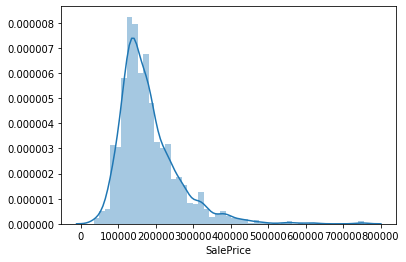

In [13]:
#目的変数　SalesPriceの分布を視覚化
import seaborn as sns
sns.distplot(df.SalePrice)
print("Skewness :", df.SalePrice.skew())
print("Kurtosis :", df.SalePrice.kurt())

In [14]:
df.SalePrice.apply(np.log)#SalePriceを対数変換

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

Skewness : 0.12133506220520406
Kurtosis : 0.8095319958036296


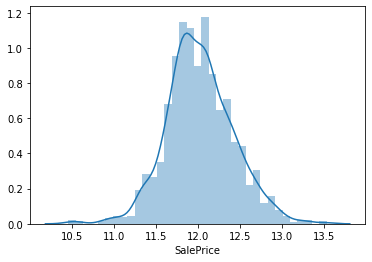

In [15]:
#対数変換あとにグラフ化
import seaborn as sns
sns.distplot(df.SalePrice.apply(np.log))
print("Skewness :", df.SalePrice.apply(np.log).skew())
print("Kurtosis :", df.SalePrice.apply(np.log).kurt())

ゆがんだ分布は，対数変換してやることによって，正規分布に近似できる 。

【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
《補足》

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります

In [16]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


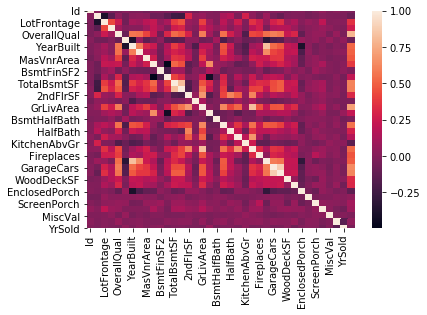

In [18]:
#ヒートマップ作成
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr())
plt.show()

In [19]:
#上記の方法では８１個表示できなかったので、１０個づつ載せて表示する。
#リスト化　列データ　　を１０個づつ格納する

list_data = []
for i in range(8):
    df_list = [df.iloc[:, 0 + i*10 : 10 + i*10], df.SalePrice]
    list_data.append(pd.concat(df_list, axis = 1))
    

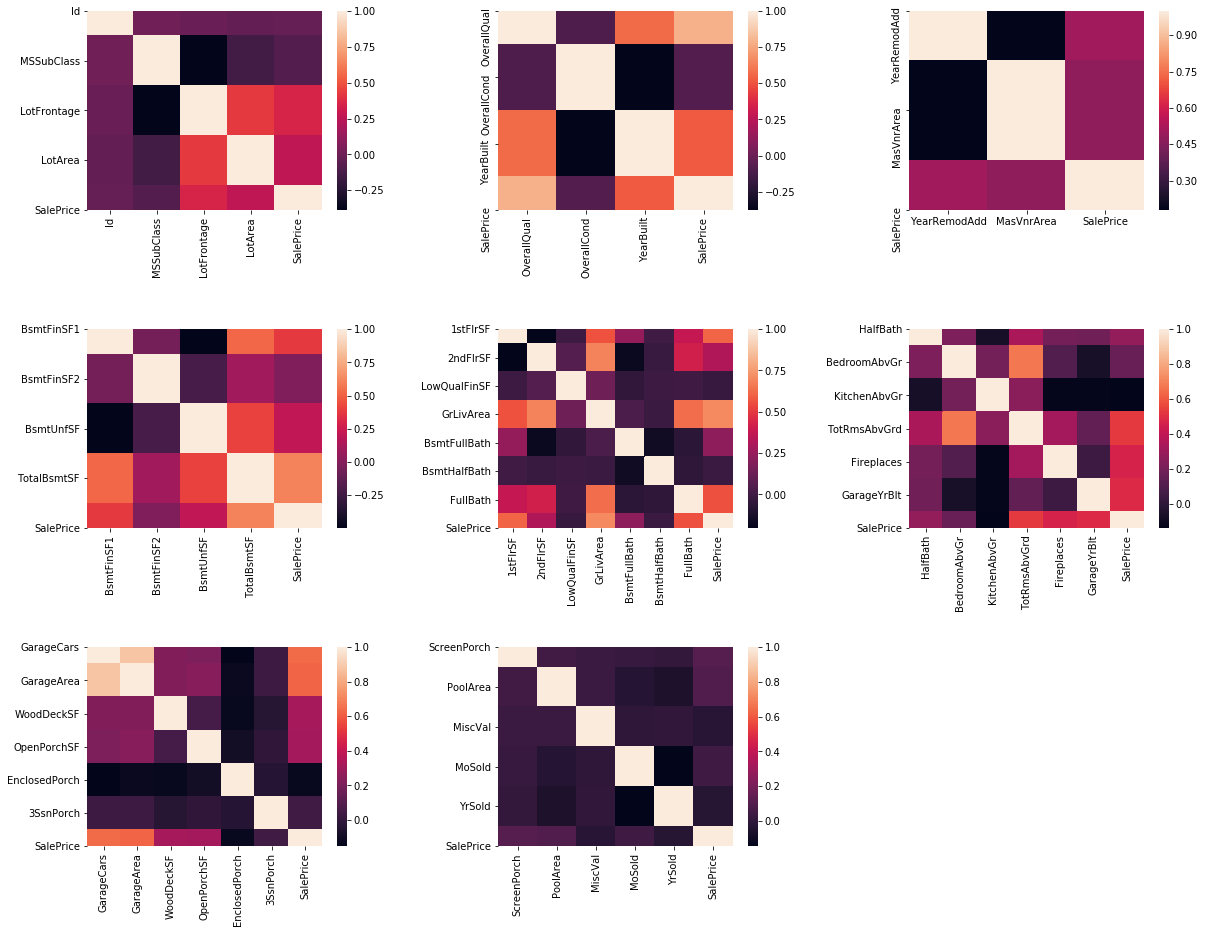

In [20]:
plt.figure(figsize=(20, 700))#figsizeの指定

for i in range(8):
    plt.subplots_adjust(wspace=0.4, hspace=0.6)#軸ラベルがダブらないようにする
    plt.subplot(120,3,i +1)#横３列、縦に１２０、８個表示
    sns.heatmap(list_data[i].corr())   
    
plt.show()

In [21]:
#色では細かい度合いがわからないので数値化
for i in range(8):
    print(list_data[i].corr().SalePrice)

Id            -0.021917
MSSubClass    -0.084284
LotFrontage    0.351799
LotArea        0.263843
SalePrice      1.000000
Name: SalePrice, dtype: float64
OverallQual    0.790982
OverallCond   -0.077856
YearBuilt      0.522897
SalePrice      1.000000
Name: SalePrice, dtype: float64
YearRemodAdd    0.507101
MasVnrArea      0.477493
SalePrice       1.000000
Name: SalePrice, dtype: float64
BsmtFinSF1     0.386420
BsmtFinSF2    -0.011378
BsmtUnfSF      0.214479
TotalBsmtSF    0.613581
SalePrice      1.000000
Name: SalePrice, dtype: float64
1stFlrSF        0.605852
2ndFlrSF        0.319334
LowQualFinSF   -0.025606
GrLivArea       0.708624
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
FullBath        0.560664
SalePrice       1.000000
Name: SalePrice, dtype: float64
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
SalePrice       1.000000
Name: SalePrice, dtype: float64
GarageCars       0.640

選んだ特徴量たち 相関関係が高いトップ１０（手動で抽出した）

OverallQual    0.790982
YearBuilt      0.522897
YearRemodAdd    0.507101
TotalBsmtSF    0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars       0.640409
GarageArea       0.623431

In [22]:
#list作成
top_10 = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
                   '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
                    'GarageArea','SalePrice']

In [23]:
#トップ１０　の数値　データ　をリスト化し結合　heatmap
df_heat_list = []
for i in top_10:
    df_heat_list.append(df[i])
    
heatmap_top10 = pd.concat(df_heat_list, axis = 1)

In [24]:
heatmap_top10

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


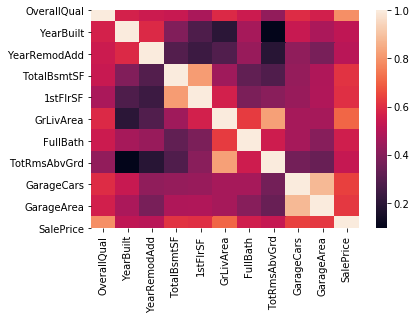

In [25]:
#ヒートマップを作成
sns.heatmap(heatmap_top10.corr())
plt.show()

データフィールド
これは、データ記述ファイルにあるものの簡単なバージョンです。
* SalePrice-プロパティの売却価格（ドル）。 これは、予測しようとしているターゲット変数です。

-[] OverallQual：全体的な品質
-[] YearBuilt：建設日
-[] YearRemodAdd：改造日
-[] TotalBsmtSF：地下室の総平方フィート
-[] 1stFlrSF：1階平方フィート
-[] GrLivArea：地上（地上）のリビングエリアの平方フィート
-[] FullBath：風呂別個
-[] TotRmsAbvGrd：グレードの高い部屋数（バスルームは含まれません）
-[] GarageCars：車の容量におけるガレージのサイズ
-[] GarageArea：平方フィート単位のガレージのサイズ

In [26]:
heatmap_top10.corr()#相関関係を数値確認

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


In [30]:
heatmap_top10.corr().drop('SalePrice')#目的変数SalePriceを削除

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


In [31]:
#どれがトップ３なのかを並べかえて見やすくする
list = []
di = {}
count = 0
for k in range(10):
    for i, num in enumerate(heatmap_top10.corr().drop('SalePrice').iloc[:,k]):
        di[i+count] = num#各数値に番号を振る（1桁目＝行、２桁目＝列）
    count += 10
 
#大きい順にならべかえる
dic2 = sorted(di.items(), key=lambda x:x[1], reverse = True)
print(dic2)

[(0, 1.0), (11, 1.0), (22, 1.0), (33, 1.0), (44, 1.0), (55, 1.0), (66, 1.0), (77, 1.0), (88, 1.0), (99, 1.0), (89, 0.8824754142814603), (98, 0.8824754142814603), (57, 0.8254893743088377), (75, 0.8254893743088377), (34, 0.8195299750050355), (43, 0.8195299750050355), (56, 0.6300116462511144), (65, 0.6300116462511144), (8, 0.6006707165907189), (80, 0.6006707165907189), (5, 0.5930074300286511), (50, 0.5930074300286511), (12, 0.5928549763436497), (21, 0.5928549763436497), (1, 0.572322768962362), (10, 0.572322768962362), (45, 0.5660239689357487), (54, 0.5660239689357487), (9, 0.5620217566126064), (90, 0.5620217566126064), (67, 0.5547842535334817), (76, 0.5547842535334817), (2, 0.550683924194174), (20, 0.550683924194174), (6, 0.5505997093682552), (60, 0.5505997093682552), (18, 0.5378500917111045), (81, 0.5378500917111045), (3, 0.5378084986123927), (30, 0.5378084986123927), (49, 0.4897816541041915), (94, 0.4897816541041915), (39, 0.48666546377379655), (93, 0.48666546377379655), (19, 0.47895381

In [32]:
#トップ３を表示
high_relation_conb =  [[89, 0.8824754142814603], [57, 0.8254893743088377], [34, 0.8195299750050355]]
count = 0
for i in high_relation_conb:
    print('組み合わせ'+ str(count+1))
    conb_1 = top_10[int(i[0]/10)]
    print(conb_1)
    conb_2 =top_10[ i[0] - top_10.index(conb_1)*10]
    print(conb_2)
    value = i[1]
    print(value)
    count += 1
    print('------')


組み合わせ1
GarageCars
GarageArea
0.8824754142814603
------
組み合わせ2
GrLivArea
TotRmsAbvGrd
0.8254893743088377
------
組み合わせ3
TotalBsmtSF
1stFlrSF
0.8195299750050355
------


以下テスト用スペース

In [150]:
top_10[int(high_relation_conb[0][0]/10)]

'GarageCars'

In [136]:
int(8.9)

8

In [137]:
89-int(8.9)*10

9

In [135]:
high_relation_conb

AttributeError: 'tuple' object has no attribute 'list'

In [86]:
df['GarageArea']

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64

In [ ]:
df_list = [df.iloc[:, 0 : 10], df.SalePrice]
relation = pd.concat(df_list, axis = 1)
relation

In [53]:
df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64